In [1]:
%cd ..

/mnt/c/Users/XCB/OneDrive - Van Oord/Documents/thesis/code


In [12]:
from atl_module.io import atl03_netcdf_loading
from atl_module.geospatial_utils.geospatial_functions import add_track_dist_meters
import pandas as pd
import geopandas as gpd
from netCDF4 import Dataset
import contextily as cx

In [17]:
netcdf_path = '../data/test_sites/oahu7/ATL03/processed_ATL03_20190908101513_11050401_005_01.nc'
# netcdf_path = '../data/test_sites/florida_keys/ATL03/processed_ATL03_20190307135537_10560201_005_01.nc'

beam = 'gt3l'
ds = Dataset(netcdf_path)
ref_ph_lats = ds.groups[beam].groups['geolocation'].variables['reference_photon_lat'][:]
ref_ph_lons = ds.groups[beam].groups['geolocation'].variables['reference_photon_lon'][:]

In [18]:
allpts = atl03_netcdf_loading.load_beam_array_ncds(netcdf_path,beam)

In [19]:
len(allpts)

72040

delta_time
2019-03-07 14:02:02.607835     1.0
2019-03-07 14:02:02.607835     2.0
2019-03-07 14:02:02.607835     3.0
2019-03-07 14:02:02.607835     4.0
2019-03-07 14:02:02.607935     5.0
                              ... 
2019-03-07 14:02:04.882235    64.0
2019-03-07 14:02:04.882235    65.0
2019-03-07 14:02:04.882235    66.0
2019-03-07 14:02:04.882335    67.0
2019-03-07 14:02:04.882335    68.0
Name: dist_or, Length: 72040, dtype: float64


<AxesSubplot:ylabel='Frequency'>

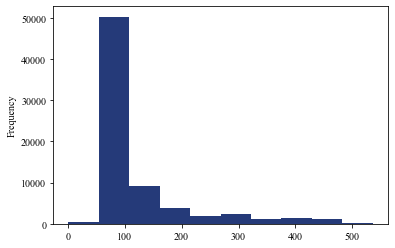

In [53]:
df_dist = add_track_dist_meters(allpts)

countdf = df_dist.set_index('delta_time').dist_or.rolling(window='3ms').count()
print(countdf)
countdf.plot.hist()

In [11]:
pd.DataFrame(allpts)

,X,Y,Z_ellip,Z_geoid,geoid_corr,tide_ocean_corr,geof2m_corr,delta_time,oc_sig_conf,land_sig_conf,p_vec_az,p_vec_elev,dac_corr,ph_count,full_sat
0,-158.143271,21.571775,20.773375,5.671177,15.104998,-0.079483,0.076683,2019-09-08 10:20:44.489461,4,4,2.818083,1.476433,-0.050594,12,0.0
1,-158.143273,21.571781,20.280296,5.178099,15.104998,-0.079483,0.076683,2019-09-08 10:20:44.489561,4,4,2.818083,1.476433,-0.050594,12,0.0
2,-158.143275,21.571793,21.030863,5.928665,15.104998,-0.079483,0.076683,2019-09-08 10:20:44.489761,4,4,2.818083,1.476433,-0.050594,12,0.0
3,-158.143282,21.571815,-5.616828,-20.719025,15.104998,-0.079483,0.076683,2019-09-08 10:20:44.489761,0,0,2.818083,1.476433,-0.050594,12,0.0
4,-158.143278,21.571812,20.524511,5.422314,15.104998,-0.079483,0.076683,2019-09-08 10:20:44.490061,4,4,2.818083,1.476433,-0.050594,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,-158.148067,21.600182,599.455811,584.756165,14.703639,-0.080568,0.076552,2019-09-08 10:20:44.952361,0,0,2.813288,1.476473,-0.050708,2,0.0
1420,-158.148302,21.601022,14.804587,0.115039,14.693594,-0.080594,0.076549,2019-09-08 10:20:44.958261,3,4,2.813205,1.476470,-0.050710,1,0.0
1421,-158.148420,21.601713,16.443354,1.753805,14.693594,-0.080594,0.076549,2019-09-08 10:20:44.969361,0,2,2.813205,1.476470,-0.050710,1,0.0
1422,-158.148431,21.601776,15.402128,0.723553,14.682652,-0.080623,0.076545,2019-09-08 10:20:44.970361,0,3,2.813080,1.476471,-0.050712,2,0.0


In [10]:
all_ph = gpd.GeoDataFrame(geometry=gpd.points_from_xy(allpts['X'],allpts['Y']),crs='EPSG:4326')
all_ph =all_ph.to_crs(all_ph.estimate_utm_crs())
ref_ph = gpd.GeoDataFrame(geometry=gpd.points_from_xy(ref_ph_lons,ref_ph_lats),crs='EPSG:4326').to_crs(all_ph.estimate_utm_crs())
all_ph.to_file('../data/derived/example_photons')
ref_ph.to_file('../data/derived/reference_photons')

/home/mlinds/mambaforge/envs/thesis_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


TypeError: object of type 'int' has no len()

In [7]:
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import Rectangle


/home/mlinds/mambaforge/envs/thesis_env/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 17).
  warnings.warn(msg)


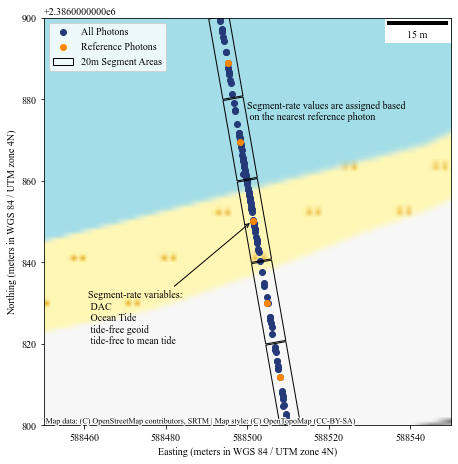

In [9]:
ax = all_ph.plot(figsize=(7.5,7.5))
ref_ph.plot(ax=ax)
ax.set_ylim((2386800,2386900))
ax.set_xlim((588450,588550))
# , -158.1449944,


# TODO add a scale bar
cx.add_basemap(ax=ax,source=cx.providers.OpenTopoMap,crs=all_ph.crs)
ax.add_artist(ScaleBar(1))
ax.set_xlabel(f'Easting (meters in {all_ph.crs.name})')
ax.set_ylabel(f'Northing (meters in {all_ph.crs.name})')

y = (2386800+2386900)/2 - 10
x= (588450+588550)/2 +1
mrguy = Rectangle((x,y),5,20,edgecolor='black',fill=False,angle=10,label='Reference photon area')
mrguy2 = Rectangle((x-3.5,y+20),5,20,edgecolor='black',fill=False,angle=10)
mrguy3 = Rectangle((x+3.5,y-20),5,20,edgecolor='black',fill=False,angle=10)
mrguy4 = Rectangle((x+3.5*2,y-20*2),5,20,edgecolor='black',fill=False,angle=10)
mrguy5 = Rectangle((x-3.5*2,y+20*2),5,20,edgecolor='black',fill=False,angle=10)

ax.add_patch(mrguy)
ax.add_patch(mrguy2)
ax.add_patch(mrguy3)
ax.add_patch(mrguy4)
ax.add_patch(mrguy5)
ax.annotate(text='Segment-rate values are assigned based \n on the nearest reference photon',xy=(588500,2386875))
ax.annotate("Segment-rate variables: \n DAC \n Ocean Tide \n tide-free geoid \n tide-free to mean tide ",xy=(x,y+10),xytext=(x-40,y-20),arrowprops=dict(arrowstyle="->"))
ax.legend(['All Photons','Reference Photons','20m Segment Areas'],loc='upper left')
ax.get_figure().savefig('../document/figures/reference_photon_plot.pdf',dpi=500,bbox_inches='tight')